# Capstone Project Final- (Week 2)
### Applied Data Science Capstone by IBM

 ## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

# Introduction: Business Problem <a name="introduction"></a>

In this project our main focus is to find a suitable and **popular business** that promises to be successful in the **city of Toronto.**

This project will be particularly **beneficial for entrepreneurs** who want to start a business but don't have any ideas in particular.
I plan to find popular business in **multiple neighborhoods** of Toronto and see how many of them are there in that particular area, we'll also do a **frequency count of popular venues** in Toronto (to see the choice of people)

After that we'll identify neighborhoods in Toronto where those popular business are either absent or the frequency is very less, thus we'll choose a neighborhood which is farthest from the popular venues (and don't have one) so that we can set-up our business idea in that area with high chances of getting success.

This will also be **beneficial for the community** of that neighborhood since they'll not have to go to long places to get the same thing which is now in thier own neighborhood.

# Data <a name="data"></a>

According to the problem statement defined above, we'll get our data in following steps:
1. Get the list of Boroughs and neighborhoods from the **internet**
2. Get the coordinates of those neighborhoods from **geocode** or any other souce
3. Get the list of venues (max. 100 per neighborhood) using **Foursquare** in 500m radius of the neighborhoods 

Execution strategy using the above mentioned data:
Once we have the data with the category of venues under 500m radius of all neighborhoods in Toronto
* group the data based on the venue category (so as to count the number of venues in a particular category)
* **Analyze popular venues** in the city using a **bar graph** (to get the category as well as the count of venues)
* Choose top **3 feasible businesses** (after sorting the data which have a high frequency in the city)
* Mark those businesses in the **city map using folium** to identify the **spread of the venues** in the city and find spots which are far from the venues
* After identifying potential neighborhoods where we can start the business, this model is ready to give **start-up ideas to entrepreneurs** 

### Getting the list of neighborhoods

In [1]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

In [2]:
# The code was removed by Watson Studio for sharing.

In [3]:
df_data_0.head()

,PostalCode,Borough,Neighborhood
0,M4N,Central Toronto,Lawrence Park
1,M5N,Central Toronto,Roselawn
2,M4P,Central Toronto,Davisville North
3,M5P,Central Toronto,Forest Hill North & West
4,M4R,Central Toronto,North Toronto West


Let's count the number of neighborhood each Borough has, we'll use this data later in our analysis

In [148]:
gf = df_data_0

In [149]:
gf['Neighborhood'] = 1

In [150]:
gf.head()

,PostalCode,Borough,Neighborhood
0,M4N,Central Toronto,1
1,M5N,Central Toronto,1
2,M4P,Central Toronto,1
3,M5P,Central Toronto,1
4,M4R,Central Toronto,1


In [152]:
data = gf.groupby('Borough').sum().reset_index()

In [153]:
data

,Borough,Neighborhood
0,Central Toronto,9
1,Downtown Toronto,19
2,East Toronto,5
3,East York,5
4,Etobicoke,12
5,Mississauga,1
6,North York,24
7,Scarborough,17
8,West Toronto,6
9,York,5


### Getting the coordinates of neighborhoods

Importing essential libraries

In [4]:
import numpy as np 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json 

from geopy.geocoders import Nominatim 

import requests 
from pandas.io.json import json_normalize 

import matplotlib.cm as cm
import matplotlib.colors as colors

!conda install -c conda-forge folium=0.5.0 --yes 
import folium 

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.4.0               |             py_0          26 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                       

In [5]:
# The code was removed by Watson Studio for sharing.

In [6]:
df_data.head()

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


Let's merge the dataframes to get a single table

In [7]:
df_merge = pd.merge(left=df_data_0, right=df_data, left_on='PostalCode', right_on='PostalCode')
df_merge.head(103)

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
1,M5N,Central Toronto,Roselawn,43.711695,-79.416936
2,M4P,Central Toronto,Davisville North,43.712751,-79.390197
3,M5P,Central Toronto,Forest Hill North & West,43.696948,-79.411307
4,M4R,Central Toronto,North Toronto West,43.715383,-79.405678
5,M5R,Central Toronto,"The Annex, North Midtown, Yorkville",43.672710,-79.405678
6,M4S,Central Toronto,Davisville,43.704324,-79.388790
7,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160
8,M4V,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049
9,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636


Let's make a table for the location of Boroughs (we'll use it to visualize Borough locations later)

In [8]:
df = pd.DataFrame(df_merge['Borough'].unique())
df = df.rename(columns={0:'Borough'})
df

,Borough
0,Central Toronto
1,Downtown Toronto
2,East Toronto
3,East York
4,Etobicoke
5,Mississauga
6,North York
7,Scarborough
8,West Toronto
9,York


Let's add the coordinates of Borough in the table made above

In [9]:
i = 0
la = []
lo = []
while (i<10):
    address = '{}, CA'.format(df['Borough'][i])
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    lati = location.latitude
    la.append(lati)
    longi = location.longitude
    lo.append(longi)
    i+=1

In [10]:
latit = pd.DataFrame(la)
latit = latit.rename(columns={0:'Latitude'})
longit = pd.DataFrame(lo)
longit = longit.rename(columns={0:'Longitude'})

In [11]:
df_borough = pd.merge(left=df, right=latit, left_index=True, right_index=True)

In [12]:
df_borough = pd.merge(left=df_borough, right=longit, left_index=True, right_index=True)

In [13]:
df_borough

,Borough,Latitude,Longitude
0,Central Toronto,43.653482,-79.383935
1,Downtown Toronto,43.656322,-79.380916
2,East Toronto,43.624790,-79.393492
3,East York,43.699971,-79.332520
4,Etobicoke,43.671459,-79.552492
5,Mississauga,43.590338,-79.645729
6,North York,43.754326,-79.449117
7,Scarborough,43.773077,-79.257774
8,West Toronto,43.653482,-79.383935
9,York,46.088526,-66.930803


Correcting some coordinates

In [14]:
df_borough.iloc[0,1] = 43.696948
df_borough.iloc[0,2] = -79.411307
df_borough.iloc[9,1] = 43.691116
df_borough.iloc[9,2] = -79.476013
df_borough.iloc[8,1] = 43.661608
df_borough.iloc[8,2] = -79.464763

#### Let's visualize the Boroughs on the map with the neighborhoods

In [15]:
address = 'Central Toronto, Toronto, CA'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [17]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)
    
for lat, lng, borough in zip(df_borough['Latitude'], df_borough['Longitude'], df_borough['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=15,
        popup=label,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  

for lat, lng, borough, neighborhood in zip(df_merge['Latitude'], df_merge['Longitude'], df_merge['Borough'], df_merge['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    

map_toronto

Let's also use clustering in the map to get better visualization

In [18]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(map_toronto)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_merge['Latitude'], df_merge['Longitude'], df_merge['Borough']):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
map_toronto

### Now let's get the list of venues for every neighborhood from Foursquare

storing the credentials

In [19]:
# The code was removed by Watson Studio for sharing.

Function for getting nearby venues for all neighborhoods

In [20]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [21]:
toronto_venues = getNearbyVenues(names=df_merge['Neighborhood'],
                                   latitudes=df_merge['Latitude'],
                                   longitudes=df_merge['Longitude']
                                  )

Lawrence Park
Roselawn
Davisville North
Forest Hill North & West
North Toronto West
The Annex, North Midtown, Yorkville
Davisville
Moore Park, Summerhill East
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Rosedale
Stn A PO Boxes
St. James Town, Cabbagetown
First Canadian Place, Underground city
Church and Wellesley
The Beaches
The Danforth West, Riverdale
India Bazaar, The Beaches West
Studio District
Business reply mail Processing Centre
Parkview Hill, Woodbine Gardens
Woodbine Heights
Leaside
Tho

Following table shows the list of various venue categores in the table corresponding to each neighborhood

In [22]:
print(toronto_venues.shape)
toronto_venues.head()

(2133, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Lawrence Park,43.728020,-79.388790,Lawrence Park Ravine,43.726963,-79.394382,Park
1,Lawrence Park,43.728020,-79.388790,Zodiac Swim School,43.728532,-79.382860,Swim School
2,Lawrence Park,43.728020,-79.388790,TTC Bus #162 - Lawrence-Donway,43.728026,-79.382805,Bus Line
3,Roselawn,43.711695,-79.416936,Rosalind's Garden Oasis,43.712189,-79.411978,Garden
4,Davisville North,43.712751,-79.390197,Homeway Restaurant & Brunch,43.712641,-79.391557,Breakfast Spot


In [23]:
df = toronto_venues

From the above operation we can see that we have **2133 total venues**

In [24]:
#Let's see how many unique categories of venues do we have
len(toronto_venues['Venue Category'].unique())

269

Let's make a table with 1 for having a venue and 0 for otherwise

In [25]:
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")


toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

fixed_columns = [toronto_onehot.columns[-81]] + list(toronto_onehot.columns[:188]) + list(toronto_onehot.columns[190:])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Neighborhood,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Moving Target,Museum,Music Venue,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Post Office,Poutine Place,Print Shop,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Lawrence Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

### Getting the frequency of each venue category for a particular neighborhood

In [26]:
toronto_n_grouped = toronto_onehot.groupby('Neighborhood').sum().reset_index()

In [27]:
toronto_n_grouped.head()

,Neighborhood,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Moving Target,Museum,Music Venue,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Post Office,Poutine Place,Print Shop,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Agincourt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

Let's create another table to see the frequency of all the venue categories in the city of Toronto

In [28]:
df_frequency = pd.DataFrame(toronto_n_grouped.sum(axis=0))
df_frequency.head()

,0
Neighborhood,"AgincourtAlderwood, Long BranchBathurst Manor,..."
Accessories Store,2
Airport,2
Airport Food Court,1
Airport Gate,1


In [31]:
df_frequency = df_frequency.drop(['Neighborhood'])

In [37]:
df_frequency.reset_index(inplace=True)

In [38]:
df_frequency.head()

,index,0
0,Accessories Store,2
1,Airport,2
2,Airport Food Court,1
3,Airport Gate,1
4,Airport Lounge,2


In [39]:
df_frequency = df_frequency.rename(columns={'index':'Venue Category', 0:'frequency'})

In [40]:
df_frequency.head()

,Venue Category,frequency
0,Accessories Store,2
1,Airport,2
2,Airport Food Court,1
3,Airport Gate,1
4,Airport Lounge,2


Finally our frequency data is ready which we'll use for frequency distribution of various venue categories in our **Analysis part**

Now our data is finally ready for the analysis which we had planned to perform on it by making clusters of our data according to venue categories and then keeping our focus on the frequency of occurance of top venues by city as well as by various neighborhoods.
We'll do that in the **analysis section** after setting our methodology clear in the **methodology section.**

# Methodology <a name="methodology"></a>

The main idea behind getting a **good start-up idea** is to see the **frequency of various venue** categories in Toronto (the more the frequency the more popular they are in the city) and then pick top venue categories which are feasible for becoming a business (or which doesn't require a huge amount of space and money etc.).



Then we'll go ahead and see the frequency of those venues in the neighborhoods (we'll **visualize this using bar graphs** and folium maps). We also plan to ultimately plot those popular venues on the **city map** so as to better understand the **location distribution** of those in the city and identify a neighborhood which is close to other neighborhoods and away from the popular businesses (or having very less number of those in that area) so that we can s**et-up our business** their which will also beneift the comunity around that area (as they'll now have to travel less to get to the same business of that particular category)

Ultimately, we'll close our project by giving final business ideas with proper locations and end the project with **results and conclusion**

# Analysis <a name="analysis"></a>

Let's start the analysis by ordering our frequency table in descending order

In [74]:
df_frequency.sort_values(by=['frequency'], axis=0, ascending=False, inplace=True)
df_frequency.reset_index(inplace=True)
df_frequency.head()

,index,Venue Category,frequency
0,63,Coffee Shop,182
1,51,Café,101
2,215,Restaurant,68
3,196,Park,51
4,200,Pizza Place,46


In [79]:
df_frequency.drop(columns='index', inplace=True)
df_frequency.head()

,Venue Category,frequency
0,Coffee Shop,182
1,Café,101
2,Restaurant,68
3,Park,51
4,Pizza Place,46


Now, let's analyze the table and observe trends from the frequency distribution

In total we know that there are total 103 neighborhoods that we are dealing with in Toronto, and we also see some venue categories which are above hundred.
Since, if any venue category is above 100 we'll not consider into our analysis as there are already a plenty of those categories in almost all the neighborhoods and doing that business won't help us to achieve our target

In [90]:
df_feasible = df_frequency[df_frequency['frequency'] < 100]
df_feasible.reset_index(inplace=True)
df_feasible.head()

,index,Venue Category,frequency
0,2,Restaurant,68
1,3,Park,51
2,4,Pizza Place,46
3,5,Italian Restaurant,46
4,6,Hotel,43


In [92]:
df_feasible.drop(columns='index', inplace=True)
df_feasible.head()

,Venue Category,frequency
0,Restaurant,68
1,Park,51
2,Pizza Place,46
3,Italian Restaurant,46
4,Hotel,43


Alright, so now we have our table let's analyze till we get top 3 business categories which are different

In [94]:
df_feasible.head(10)

,Venue Category,frequency
0,Restaurant,68
1,Park,51
2,Pizza Place,46
3,Italian Restaurant,46
4,Hotel,43
5,Japanese Restaurant,42
6,Sandwich Place,39
7,Bakery,38
8,Clothing Store,37
9,Gym,34


In the above table we can clearly identify following categories where we can start our business
* Bakery (38 total)
* Clothing Store (37 total)
* Gym (34 total)

We have removed restaurants from our list as they are above 100 (also there are many different categories which might be below hundred but the overall venue category is way above 100)

So, our focus is now shifted towards **Bakery, Clothing Store and Gym**, let's find the frequency of those Borough-wise and Neighborhood-wise

In [104]:
df_potential = toronto_n_grouped[['Neighborhood', 'Gym', 'Clothing Store', 'Bakery']]
df_potential.head()

,Neighborhood,Gym,Clothing Store,Bakery
0,Agincourt,0,1,0
1,"Alderwood, Long Branch",1,0,0
2,"Bathurst Manor, Wilson Heights, Downsview North",0,0,0
3,Bayview Village,0,0,0
4,"Bedford Park, Lawrence Manor East",0,0,0


Let's also add Boroughs to our table

In [140]:
df_borough = pd.merge(left=df_potential, right=df_data_0, left_on='Neighborhood', right_on='Neighborhood')
df_borough.head()

,Neighborhood,Gym,Clothing Store,Bakery,PostalCode,Borough
0,Agincourt,0,1,0,M1S,Scarborough
1,"Alderwood, Long Branch",1,0,0,M8W,Etobicoke
2,"Bathurst Manor, Wilson Heights, Downsview North",0,0,0,M3H,North York
3,Bayview Village,0,0,0,M2K,North York
4,"Bedford Park, Lawrence Manor East",0,0,0,M5M,North York


Let's clean the above table a bit

In [145]:
df_borough.drop(columns = ['PostalCode','Neighborhood'], axis=1, inplace=True)

In [155]:
df_borough = df_borough.groupby('Borough').sum().reset_index()

In [156]:
df_borough

,Borough,Gym,Clothing Store,Bakery
0,Central Toronto,4,3,0
1,Downtown Toronto,20,18,22
2,East Toronto,1,1,3
3,East York,2,0,0
4,Etobicoke,3,0,2
5,Mississauga,1,0,0
6,North York,4,15,2
7,Scarborough,0,1,4
8,West Toronto,1,0,5
9,York,0,0,0


In [158]:
df_borough = pd.merge(left=df_borough, right=data, left_on='Borough', right_on='Borough')

In [159]:
df_borough

,Borough,Gym,Clothing Store,Bakery,Neighborhood
0,Central Toronto,4,3,0,9
1,Downtown Toronto,20,18,22,19
2,East Toronto,1,1,3,5
3,East York,2,0,0,5
4,Etobicoke,3,0,2,12
5,Mississauga,1,0,0,1
6,North York,4,15,2,24
7,Scarborough,0,1,4,17
8,West Toronto,1,0,5,6
9,York,0,0,0,5


In [168]:
df_plot = df_borough.set_index('Borough')

In [170]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.style.use('ggplot')

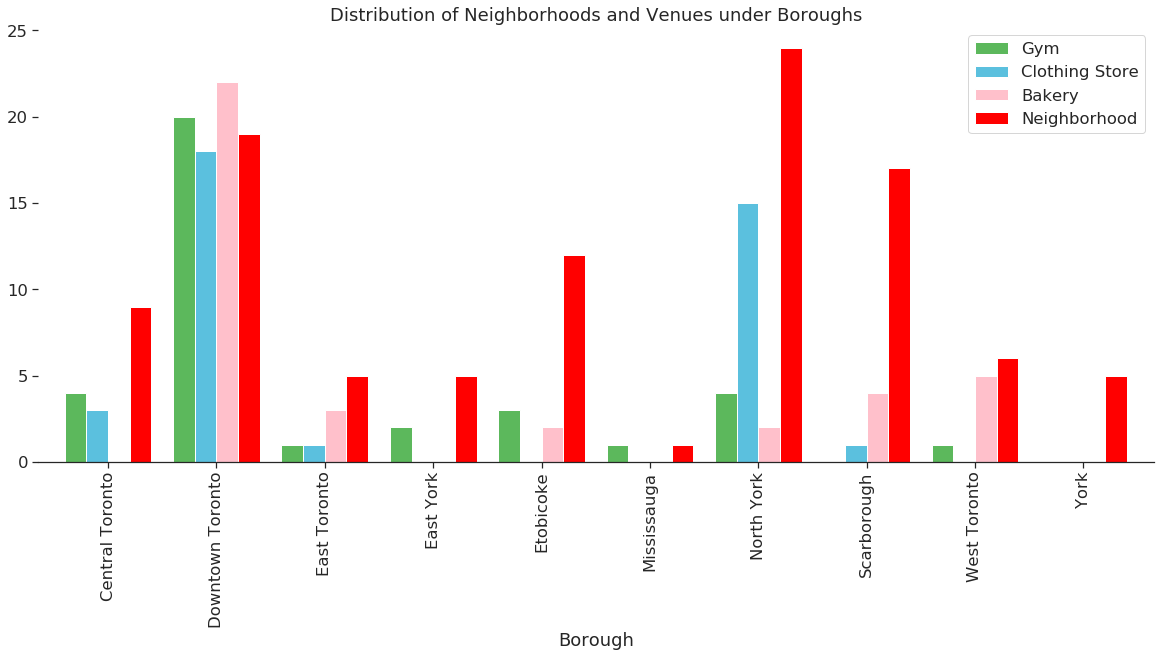

In [179]:
ax = df_plot.plot(kind='bar', 
             alpha=1, 
             figsize=(20,8),
             color=['#5cb85c','#5bc0de', 'pink', 'red'],
             width = 0.8
            )

sns.set(font_scale=1.5)
sns.set(font_scale=1.5)

sns.set_style('ticks')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_title("Distribution of Neighborhoods and Venues under Boroughs")

plt.show()

Now we are interested in identifying those places where there are more neighborhoods and less venues

### Analysis of the bar graph


Let's filter out those Boroughs with high number of neighborhoods
* **North York**
* **Downtown Toronto**
* **Scarborough**
* **Etobicoke**

All of the above boroughs have > 10 neighborhoods, now let's analyze each of them individually
1. North York: Contains very high number of clothing stores with some amount of gym and bakery .. so setting-up gym or bakery would be feasible
2. Downtown Toronto: All three venues are in plenty and equivalent to the number of neighborhood .. let's not have any business here
3. Scarborough: There are very few bakery and clothing store, but we notice that there is not gym here .. **Opening-up a gym** would really be great in this borough
4. Etobicoke: Condition is somewhat similar to Scarborough but here there is no Clothing Store .. **Opening-up a Clothing Store** would be a good idea here

# Results and Discussion <a name="results"></a>

After doing a thorough analysis by we can suggest two ideas confidently which promise to get successful in the suggested boroughs, the ideas that are being suggested are as follows:

* Gym in Scarborough
* Clothing Store in Etobicoke

We saw that these are the boroughs that have a good number of overall neighborhoods (>10) but don't have the category of venue that is suggested by us, which we belive is going to be a good hit since it does not exist in that borough at all.

Since, we are suggesting our idea to an entreprenuer, we must also see if we can suggest the rates or the amount of moeny that'll be required to open-up those businesses and could perform a economic analysis for the same.

One should also note that, we have given the above ideas considering non-corona situation as the cases in Canada are rising and nobody would certainly go to a gym or go out to buy clothes. This is a limitation which we can understand that is out of scope for this project as our main focus was to use the Foursqare data and make sense out of that.

So, when things get normal and the COVID situation goes away, then this is something we can start for sure.

# Conclusion <a name="conclusion"></a>

We can conclude that opening-up a Gym at Scarborough and a Clothing Store at Etobicoke in Toronto can be a great business ideas to do when things are according to BAU (Business As Usual) and we don't have any situation like of the current COVID-19.

Also finished our main objective of the project by giving business ideas to those start-ups who want to start something and have the money but don't know what they can do.

Provided startups with 2 ideas with the location where they can set-up their business as decided in the defination of the problem statement at the start.



**A big thank you for reading and understanding my project**